# Exploratory analysis of air quality dataset from UCI

https://archive.ics.uci.edu/ml/datasets/Air+Quality

### Import necessary packages

In [252]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

In [253]:
from datetime import datetime
def dateparse(d,t):
    dt = d + " " + t
    return pd.datetime.strptime(dt, '%d/%m/%Y %H.%M.%S')

df = pd.read_csv('data/AirQualityUCI_combined.csv',sep=';',decimal=',', parse_dates={'datetime': ['Date', 'Time']})
df.drop(['Unnamed: 15'],axis=1, inplace=True)

# From the dataset description we know that unknown/missing values are marked as -200.0.
# we fill those values using ffill: propagate last valid observation forward
df = df.replace({-200.0:np.nan})
df = df.fillna(method='ffill')
df = df.dropna(axis=0)
df = df.set_index('datetime')


In [254]:
df.head()

,CO(GT),PT08.S1(CO),NMHC(GT),C6H6(GT),PT08.S2(NMHC),NOx(GT),PT08.S3(NOx),NO2(GT),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
datetime,,,,,,,,,,,,,
2004-10-03 18:00:00,2.6,1360.0,150.0,11.9,1046.0,166.0,1056.0,113.0,1692.0,1268.0,13.6,48.9,0.7578
2004-10-03 19:00:00,2.0,1292.0,112.0,9.4,955.0,103.0,1174.0,92.0,1559.0,972.0,13.3,47.7,0.7255
2004-10-03 20:00:00,2.2,1402.0,88.0,9.0,939.0,131.0,1140.0,114.0,1555.0,1074.0,11.9,54.0,0.7502
2004-10-03 21:00:00,2.2,1376.0,80.0,9.2,948.0,172.0,1092.0,122.0,1584.0,1203.0,11.0,60.0,0.7867
2004-10-03 22:00:00,1.6,1272.0,51.0,6.5,836.0,131.0,1205.0,116.0,1490.0,1110.0,11.2,59.6,0.7888


### Attribute details

|| Attribute | Description                                                                                            |
|-|-----------|--------------------------------------------------------------------------------------------------------|
|Ground truth &rightarrow;| CO        | True hourly averaged concentration CO in mg/m<sup>3</sup> (reference analyzer)                                   |
|| PT08.S1   | Tin oxide: hourly averaged sensor response (nominally CO targeted)                                     |
|Ground truth &rightarrow;| NMHC      | True hourly averaged overall Non Metanic HydroCarbons concentration in microg/m<sup>3</sup> (reference analyzer) |
|Ground truth &rightarrow;| C6HC      | True hourly averaged Benzene concentration in microg/m<sup>3</sup> (reference analyzer)                          |
|| PT08.S2   | Titania: hourly averaged sensor response (nominally NMHC targeted)                                     |
|Ground truth &rightarrow;| NO<sub>x</sub>       | True hourly averaged NO<sub>x</sub> concentration in ppb (reference analyzer)                                     |
|| PT08.S3   | Tungsten oxide: hourly averaged sensor response (nominally NO<sub>x</sub> targeted)                               |
|Ground truth &rightarrow;| NO<sub>2</sub>       | True hourly averaged NO<sub>2</sub>  concentration in microg/m<sup>3</sup> (reference analyzer)                              |
|| PT08.S4   | Tungsten oxide: hourly averaged sensor response (nominally NO<sub>2</sub> targeted)                               |
|| PT08.S5   | Indium oxide: hourly averaged sensor response (nominally O<sub>3</sub> targeted)                                  |
|| T         | Temperature in °C                                                                                      |
|| RH        | Relative Humidity (%)                                                                                  |
|| AH        | Absolute Humidity   

In [255]:
ground_truth = ['CO(GT)','C6H6(GT)','NMHC(GT)','NOx(GT)','NO2(GT)']
df = df.drop(ground_truth,axis=1)
df.describe()

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
count,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000,9357.000000
mean,1102.730362,942.548253,832.742225,1453.014535,1030.511916,18.317356,48.817431,1.017382
std,219.588101,269.581368,255.709423,347.434084,410.916759,8.821883,17.354326,0.404829
min,647.000000,383.000000,322.000000,551.000000,221.000000,-1.900000,9.200000,0.184700
25%,938.000000,733.000000,655.000000,1228.000000,726.000000,11.900000,35.400000,0.726200
50%,1062.000000,911.000000,807.000000,1460.000000,964.000000,17.600000,48.900000,0.987500
75%,1237.000000,1117.000000,968.000000,1677.000000,1287.000000,24.300000,61.900000,1.306700
max,2040.000000,2214.000000,2683.000000,2775.000000,2523.000000,44.600000,88.700000,2.231000


In [256]:
# Range of the dataset
print(df.index.min())
print(df.index.max())

2004-01-04 00:00:00
2005-12-03 23:00:00


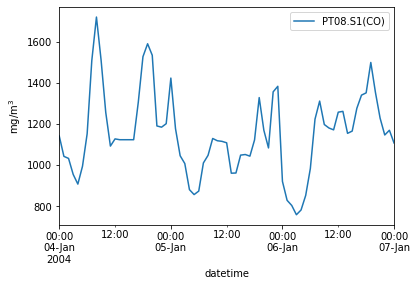

In [257]:
df.loc['2004-01-04 00:00:00':'2004-01-07 00:00:00'][['PT08.S1(CO)']].plot()
plt.ylabel(r'mg/m$^3$')
plt.show()

### Correlation
Since there are multiple independent variables, let understand how they are all correlated to each other

In [258]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm',axis=None).set_precision(2)

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
PT08.S1(CO),1.00,0.90,-0.78,0.68,0.90,0.04,0.12,0.12
PT08.S2(NMHC),0.90,1.00,-0.80,0.77,0.88,0.23,-0.08,0.17
PT08.S3(NOx),-0.78,-0.80,1.00,-0.54,-0.80,-0.13,-0.06,-0.22
PT08.S4(NO2),0.68,0.77,-0.54,1.00,0.58,0.56,-0.02,0.63
PT08.S5(O3),0.90,0.88,-0.80,0.58,1.00,-0.04,0.14,0.06
T,0.04,0.23,-0.13,0.56,-0.04,1.00,-0.57,0.65
RH,0.12,-0.08,-0.06,-0.02,0.14,-0.57,1.00,0.18
AH,0.12,0.17,-0.22,0.63,0.06,0.65,0.18,1.00


From the above the correlation matrix, we can infer that several attributes correlate with each other

For instance the CO concentration levels are strongly correlated with PT08.S2 (non-metallic hydro-carbon)(+ve) levels, PT08.S4 (NO<sub>2</sub>)(+ve) levels, PT08.S5 (O<sub>3</sub>)(+ve) levels and PT08.S3 (NO<sub>x</sub>)(-ve).

## Feature engineering

In [259]:
df.head()

,PT08.S1(CO),PT08.S2(NMHC),PT08.S3(NOx),PT08.S4(NO2),PT08.S5(O3),T,RH,AH
datetime,,,,,,,,
2004-10-03 18:00:00,1360.0,1046.0,1056.0,1692.0,1268.0,13.6,48.9,0.7578
2004-10-03 19:00:00,1292.0,955.0,1174.0,1559.0,972.0,13.3,47.7,0.7255
2004-10-03 20:00:00,1402.0,939.0,1140.0,1555.0,1074.0,11.9,54.0,0.7502
2004-10-03 21:00:00,1376.0,948.0,1092.0,1584.0,1203.0,11.0,60.0,0.7867
2004-10-03 22:00:00,1272.0,836.0,1205.0,1490.0,1110.0,11.2,59.6,0.7888


In [271]:
df['month'] = df.index.month_name()
df['day'] = df.index.day_name()
df['is_weekend'] = [1 if ( x == 'Saturday' or x == 'Sunday') else 0 for x in df['day']]

df_encoded = pd.get_dummies(df)
df_encoded.to_pickle('data/df_encoded.pkl')

## Principle Component Analysis

In [267]:

# Loop Function to identify number of principal components that explain at least 85% of the variance
for comp in range(3, df_encoded.shape[1]):
    pca = PCA(n_components= comp, random_state=42)
    pca.fit(scale(df_encoded))
    comp_check = pca.explained_variance_ratio_
    final_comp = comp
    if comp_check.sum() > 0.86:
        break
        
Final_PCA = PCA(n_components= final_comp,random_state=42)
Final_PCA.fit(df_encoded)

num_comps = comp_check.shape[0]
print("Using {} components, we can explain {}% of the variability in the original data.".format(final_comp,round(comp_check.sum()*100,2)))

Using 17 components, we can explain 89.12% of the variability in the original data.


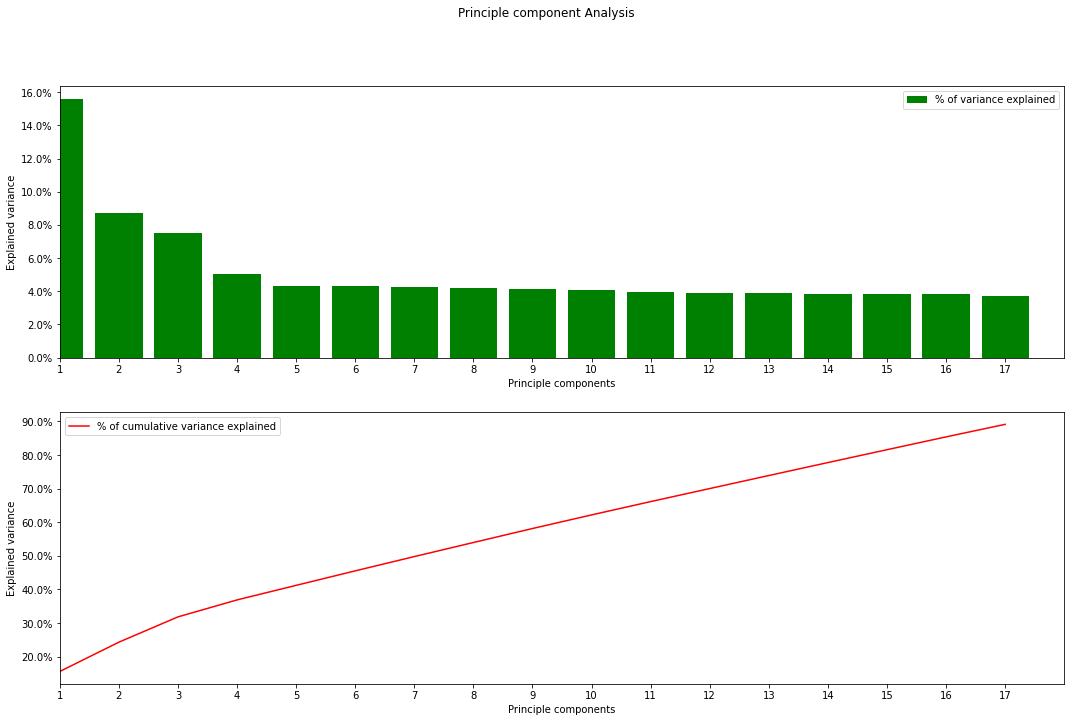

In [270]:
pca = PCA(n_components=final_comp, random_state=42)
pca.fit(scale(df_encoded))
bar_range = pca.n_components_+1
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
plt.rcParams['figure.figsize'] = [18, 11]

fig = plt.figure()
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

fig.suptitle('Principle component Analysis')


ax1.bar(list(range(1, bar_range)),pca.explained_variance_ratio_,color='g',label="% of variance explained")
ax1.legend(loc='upper right')


ax2.plot(list(range(1, bar_range)), np.cumsum(pca.explained_variance_ratio_), color='r',label="% of cumulative variance explained")
ax2.legend(loc='upper left')

for ax in [ax1,ax2]:
    ax.set_xlim([1,bar_range])
    ax.yaxis.set_major_formatter(mtick.PercentFormatter(1.0,decimals=1))
    ax.set_xlabel('Principle components')
    ax.set_ylabel('Explained variance')
    plt.setp(ax, xticks=[s for s in range(1, bar_range)])
    

plt.show()